# TP MACHINE LEARNING
Osman Raafat et Perrier Romain

## 1. The datasets: MNIST

In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install tensorflow
#!pip install yellowbrick

In [ ]:
#On import d'abord les librairies
import numpy
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score

In [4]:
#Ensuite on import les dataset
path = "C:\\Users\\perri\\Desktop\\MNIST\\"
#path = "C:\\Users\\raafat\\Desktop\\ismin\\py39\\ml\\"

data_x = numpy.load(path+'MNIST_X_28x28.npy')
data_y = numpy.load(path+'MNIST_y.npy')

1. What are the shape of the data?

In [5]:
print("data_x a pour format : ",end="")
print(numpy.shape(data_x))
print("data_y a pour format : ",end="")
print(numpy.shape(data_y))

data_x a pour format : (70000, 28, 28)
data_y a pour format : (70000,)


1.2 Display samples from the dataset

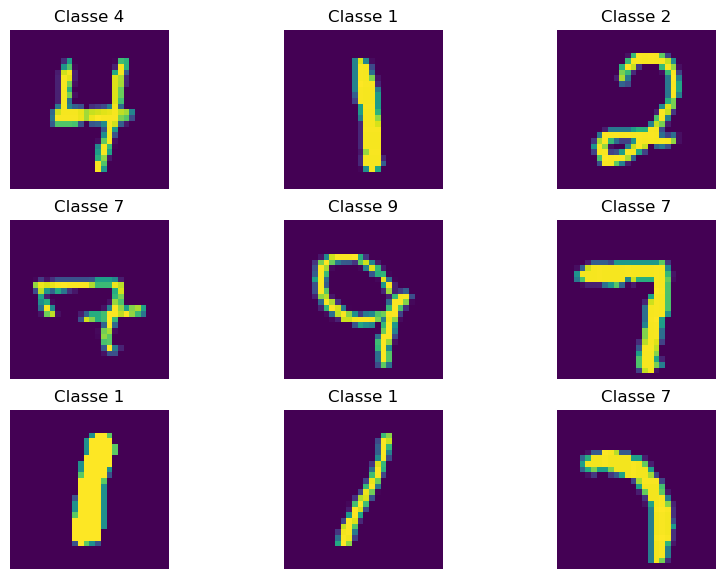

In [7]:
fig = plt.figure(figsize=(10, 7))
row, column = 3, 3
for i in range(1, row*column+1):
    fig.add_subplot(row, column, i) #Subplot
    plt.imshow(data_x[i])
    img_title = 'Classe '+str(data_y[i])
    plt.axis('off')
    plt.title(img_title)
plt.show()
plt.close()

2. Use the sklearn method train_test_split to split the dataset in one train set and
one test set. Why this split is important in Machine Learning?

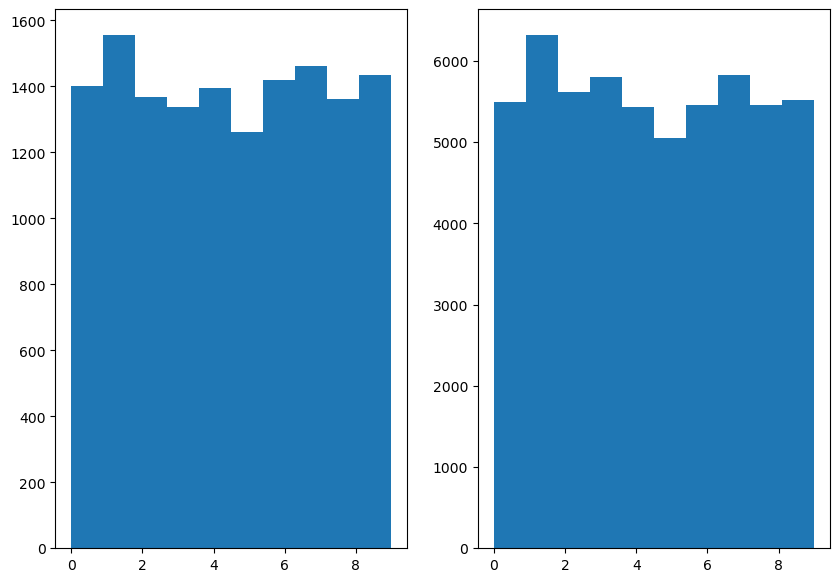

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42) #Split
fig2 = plt.figure(figsize=(10, 7))
row, column = 1, 2
fig2.add_subplot(row, column, 1)
plt.hist(y_test, bins=10) #Histogramme 1
fig2.add_subplot(row, column, 2)
plt.hist(y_train, bins=10) #Histogramme 2
plt.show()
plt.close()

3. Are the train and test sets well balanced (distribution of labels)?
Why is it important for supervised Machine Learning?

## 2. Unsupervised Machine Learning

## 2.1. Dimensionality reduction

4. Perform a Principal Component Analysis (PCA) with sklearn.
Try to keep different n_components

In [9]:
x_train.reshape(-1, 1)
if len(numpy.shape(x_train))!=2:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
pca = PCA(n_components=154, svd_solver='full')

5. An interesting feature is PCA.explained_variance_ratio_
Explain these values according to your understanding of PCA and use these
values to fit a relevant value for n_components

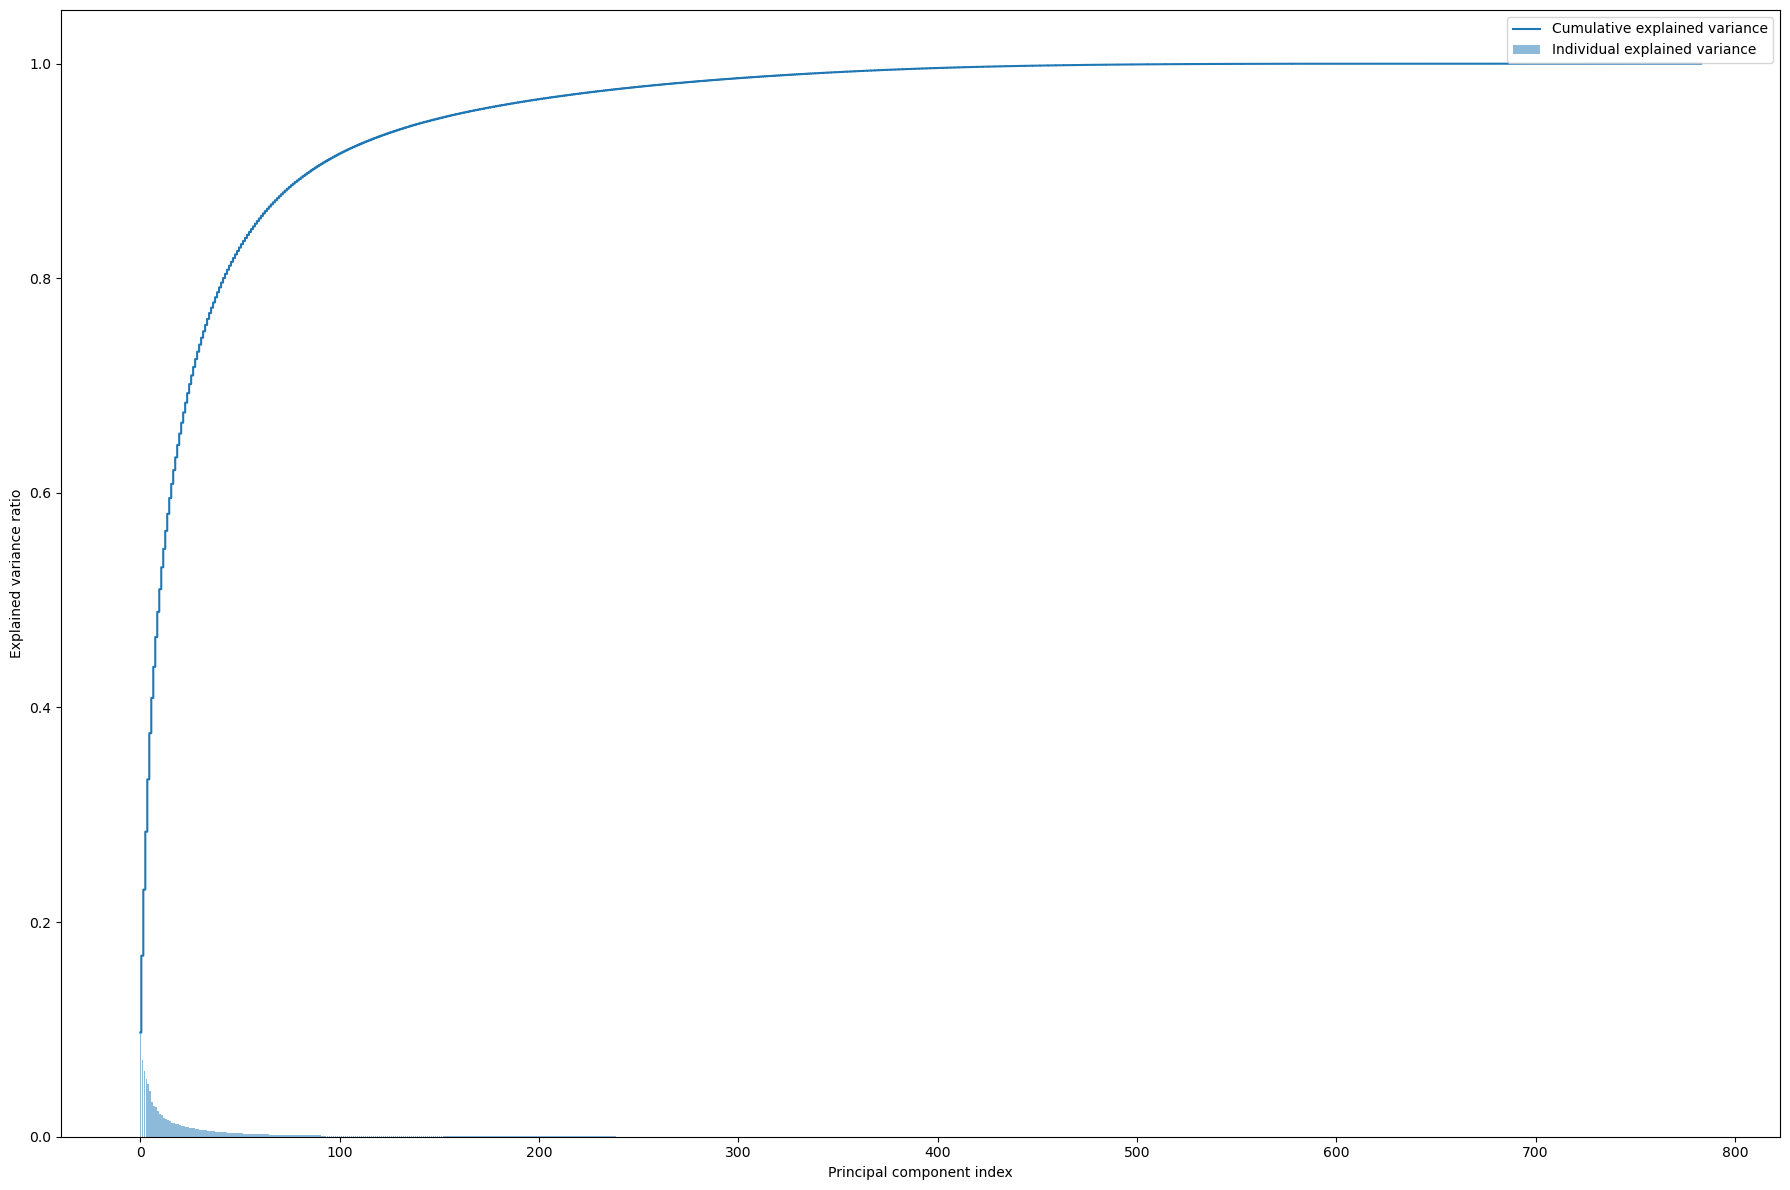

In [10]:
fig = plt.figure(figsize=(18, 12))
row, column = 2, 4
pca = PCA(n_components=784, svd_solver='full') # On sélectionne tous les pixels
x_train_pca = pca.fit(x_train).transform(x_train)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = numpy.cumsum(exp_var_pca) #Somme partielle des variances
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5,align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues,where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
n_depart = 150
pas = 1
pca = PCA(n_components=n_depart, svd_solver='full')
pca.fit(x_train)
while sum(pca.explained_variance_ratio_) < 0.95: #On cherche une variance > 95%
    pca = PCA(n_components=pca.n_components_+pas, svd_solver='full')
    pca.fit(x_train)
print("A good n_components is " + str(pca.n_components) +" because the variance is " + str(sum(pca.explained_variance_ratio_)))

A good n_components is 154 because the variance is 0.9504280929680099


6. Display some MNIST pictures with different values of n_components.

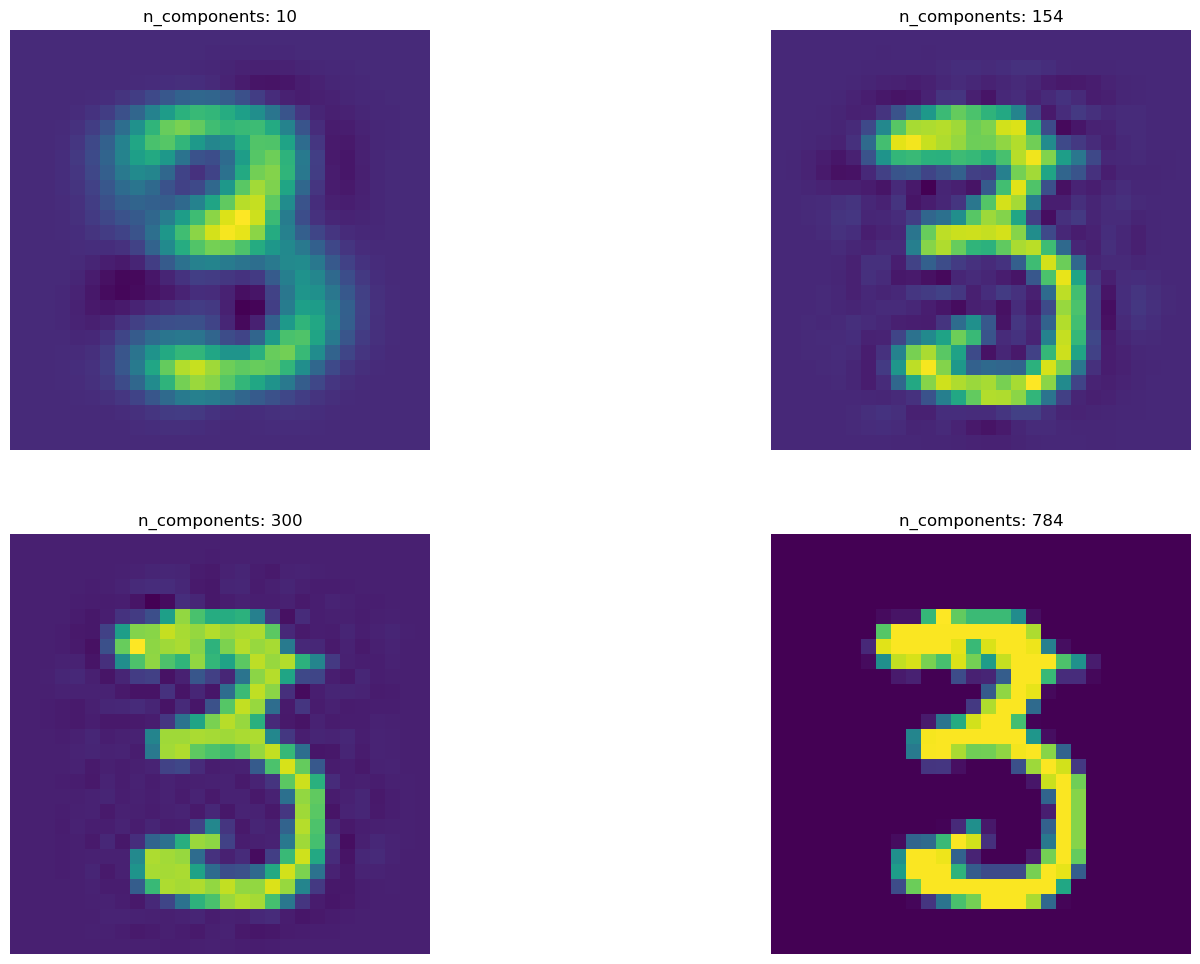

In [11]:
value = [10,154,300,784]
j = 1
fig = plt.figure(figsize=(18, 12))
row, column = 2, 2
for i in value:
    pca = PCA(n_components=i, svd_solver='full')
    pca.fit(x_train)
    X_reduced = pca.transform(x_train)
    X_reduced_img = pca.inverse_transform(X_reduced)  #On inverse la PCA pour avoir une image visible
    X_reduced_img =numpy.reshape(X_reduced_img,(56000,28,28))
    fig.add_subplot(row, column, j)
    plt.imshow(X_reduced_img[0])
    plt.axis('off')
    plt.title('n_components: '+str(i))
    j+=1
plt.show()

## 2.2. Data clustering

7. You already split X (and y) in a train and test sets with the sklearn method:
split_train_test. With sklearn, perform K-MEANS. Play with the parameter K as
well as the initialization (KMEANS++, random, or fixed array)

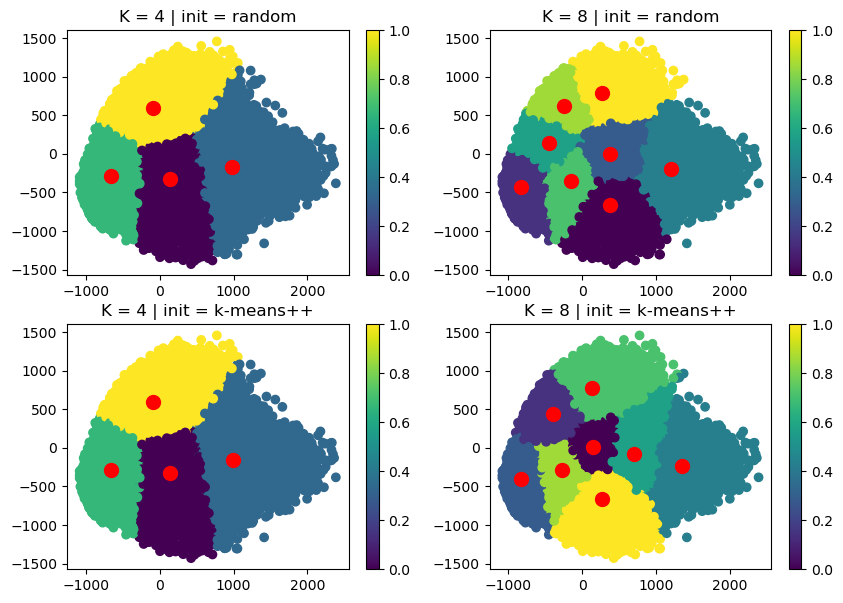

In [11]:
fig = plt.figure(figsize=(10, 7))
row, column = 2, 2
j = 1
n_init = ['random','k-means++']
for k in range(2): #Pour tous les types d'init
    for i in range(4,9,4): #pour k = 4 et k = 8
        fig.add_subplot(row, column, j)
        pca = PCA(n_components=2, svd_solver='full')
        new_x_train = pca.fit(x_train).transform(x_train)
        kmeans = KMeans(n_clusters=i, random_state=0,init = n_init[k])
        kmeans.fit(new_x_train) 
        #On affiche la représentation de nos k-means
        kmeans_label = kmeans.predict(new_x_train)
        plt.scatter(new_x_train[:, 0], new_x_train[:, 1],
                c=kmeans_label)
        kmeans_center = kmeans.cluster_centers_
        plt.scatter(kmeans_center[:, 0], kmeans_center[:, 1], c='red', s=100)
        plt.title('K = '+str(i)+' | init = '+n_init[k])
        plt.colorbar()
        j+=1
plt.show()

8. For the correct K (K=10), evaluate how good is this partition (with the knowledge
of y).

Silhouette Score for k =  8 is 0.07345140609863368
Silhouette Score for k =  9 is 0.05686282275980746
Silhouette Score for k =  10 is 0.05898868551234353
Silhouette Score for k =  11 is 0.05788974773341805
Silhouette Score for k =  12 is 0.058488893337887274


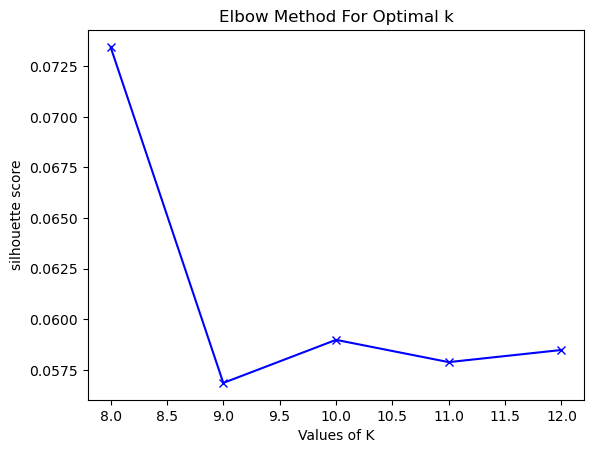

In [14]:
#Attention, temps d'execution ~10min
silhouette_scores = []
K = range(8,13) #On cherche le meilleur score silhouette pour des K proche de 10
for num_clusters in K :
    km = KMeans(n_clusters=num_clusters)
    km.fit(x_train)
    score = silhouette_score(x_train, km.labels_)
    print("Silhouette Score for k = ", num_clusters , "is", score)
    silhouette_scores.append(score)
#On affiche la représentation de nos scores
plt.plot(K,silhouette_scores,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('silhouette score') 
plt.title('Elbow Method For Optimal k')
plt.show()

9. Using the PCA performed in section 2 apply K-MEANS with K=10 and
n_components = 2. Display the partition and comment.

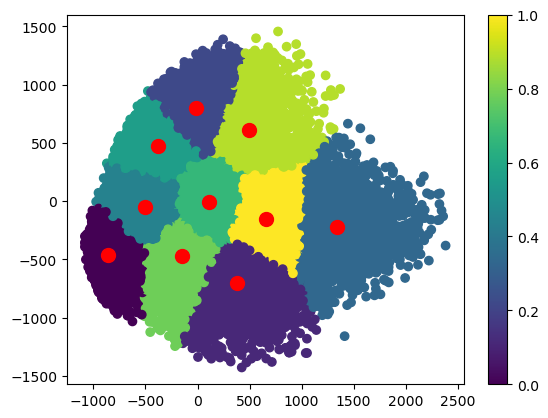

In [12]:
#Comme précédement on affiche notre k-means
pca = PCA(n_components=2, svd_solver='full')
new_x_train = pca.fit(x_train).transform(x_train)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(new_x_train)
kmeans_label = kmeans.predict(new_x_train)
plt.scatter(new_x_train[:, 0], new_x_train[:, 1],
            c=kmeans_label)
kmeans_center = kmeans.cluster_centers_
plt.scatter(kmeans_center[:, 0], kmeans_center[:, 1], c='red', s=100)
plt.colorbar()
plt.show()

10. Do the same job with the EM-clustering using the good K parameter (10 for
MNIST). Comment your results.

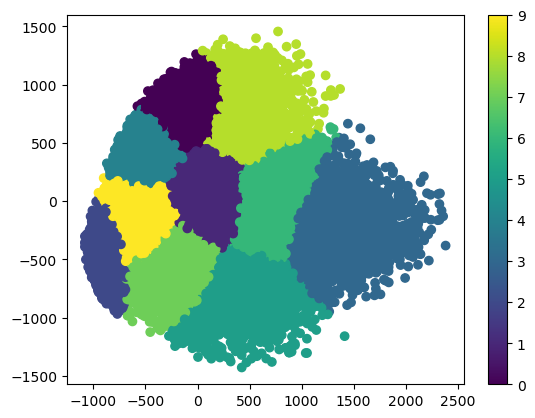

In [14]:
pca = PCA(n_components=2, svd_solver='full')
new_x_train = pca.fit(x_train).transform(x_train)
em = GaussianMixture(n_components = 10, random_state=0).fit(new_x_train)
em_label = em.predict(new_x_train)
plt.scatter(new_x_train[:, 0], new_x_train[:, 1],
            c=em_label)
plt.colorbar()
plt.show()

# 3. Supervised learning
## 3.1- Decision Tree, SVM and Logistic Regression

11. What is the major difference between Naïve Bayes Classifier and Support Vector
Machine (or Logistic Regression)? (if you forgot the course #2, a clue: what are
we trying to predict?)

12. With sklearn, perform a classification using your favorite methods. With the
documentation, check how to modify the parameters and comment how it
influences the results.
For example, if you chose SVM, change the kernel between ‘linear’ and ‘rbf’
(Gaussian kernel). You can also play with ‘C’ parameter to switch from hard-
margin SVM to soft-margin SVM2...

In [26]:
# Loading data
X=numpy.load(path+'MNIST_X_28x28.npy')
y=numpy.load(path+'MNIST_y.npy')
kernel_list = ['linear','rbf']
res_list = []
for i in range(3): #Pour C = 1, C = 1.5, C = 2
    for j in range(2): # Pour kernel = linear et kernel = rbf
        X = X.reshape(X.shape[0],-1)
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
        start = time.time()
        clf = SVC(C=i*0.5+1, kernel = kernel_list[j],gamma='auto' , verbose=True, max_iter=10)
        clf.fit(X_train, y_train)
        res_list.append([kernel_list[j], str(i*0.5+1), str( time.time() - start), clf.score(X_test,y_test)])
for k in range(6):
    print('Kernel = '+res_list[k][0]+' | C = '+res_list[k][1]+' | Training time :'+res_list[k][2])
    print("Accuracy is : "+str(res_list[k][3]))

[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Kernel = linear | C = 1.0 | Training time :4.92588210105896
Accuracy is : 0.5668571428571428
Kernel = rbf | C = 1.0 | Training time :5.2756359577178955
Accuracy is : 0.12714285714285714
Kernel = linear | C = 1.5 | Training time :4.6116814613342285
Accuracy is : 0.5668571428571428
Kernel = rbf | C = 1.5 | Training time :5.276320219039917
Accuracy is : 0.12714285714285714
Kernel = linear | C = 2.0 | Training time :4.670898675918579
Accuracy is : 0.5668571428571428
Kernel = rbf | C = 2.0 | Training time :5.654214859008789
Accuracy is : 0.12714285714285714


In [24]:
# Loading data
X=numpy.load(path+'MNIST_X_28x28.npy')
y=numpy.load(path+'MNIST_y.npy')

X = X.reshape(X.shape[0],-1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

pca = PCA(n_components=2, svd_solver='full')
new_x_train = pca.fit(X_train).transform(X_train)
new_x_test = pca.transform(X_test)
print("\nTraining the model ...")
start = time.time()
clf = SVC(C=2.0, kernel = 'linear', gamma='auto' , verbose=True, max_iter=500) #SVM en kernel = linear, C = 2
clf.fit(new_x_train, y_train)
print("time for Training : "+str( time.time() - start) )
start = time.time()
print("Accuracy is : ",end = "")
print(clf.score(new_x_test,y_test))
print("time for testing : "+str( time.time() - start) )


Training the model ...
[LibSVM]

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


time for Training : 1.8673806190490723
Accuracy is : 0.23757142857142857


13. With the score method, compute the accuracy of the model on the training and
the test datasets. Why do we need to analyze the performance of the model at
training and testing time?

2- Decsion tree 

In [ ]:
#Data in [0,1] is usually a good idea...
dx = data_x/255.0
dx = dx.reshape(70000,-1) 

train_size=20000
test_size=50000
num_classes=10

#Split Train / Test
X_train, X_test, Y_train, Y_test = train_test_split(dx, data_y,
                train_size=train_size, test_size=test_size)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

In [ ]:
#Data in [0,1] is usually a good idea...
dx = data_x/255.0
dx = dx.reshape(70000,-1) 

train_size=20000
test_size=50000
num_classes=10

#Split Train / Test
X_train, X_test, Y_train, Y_test = train_test_split(dx, data_y,
                train_size=train_size, test_size=test_size)


pca = PCA(n_components=2, svd_solver='full')
new_x_train = pca.fit(X_train).transform(X_train)
new_x_test = pca.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(new_x_train, Y_train)
print(clf.score(new_x_train, Y_train))
print(clf.score(new_x_test, Y_test))

14. In section 2.1. you applied a PCA to X so that the projected set – hereafter Xred –
lies on a “reduced” space. Among the supervised methods you chose, select one
method and apply your code to Xred. Does the PCA influence the performance of
the classification (according to the intensity of the reduction)?

## 3.2 Deep learning
### 1- MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

15. What is the size of the input tensor? What is the size of the output layer?

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

# Loading data
data_x = numpy.load(path+'MNIST_X_28x28.npy')
data_y = numpy.load(path+'MNIST_y.npy')

# Spliting data between train and test
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

16. How many epochs do you use? What does it mean? What is the batch_size? What
does it means?

17.Why do we define a validation set (for example: validation_split=0.2)?

18. Pick the most important parameters you have to set with the compile and the
fit method. Briefly explain why they are important parameters, i.e. they
influence the training process.

In [ ]:
# Model 1: 5 layers with little number of neurons
x = keras.Sequential(
    [
        keras.Input(input_shape),
        layers.Dense(10, activation="relu", name="layer1"),
        layers.Dense(7, activation="relu", name="layer2"),
        layers.Dense(6, name="layer3"),
        layers.Dropout(0.25),
        layers.Dense(5, activation="relu", name="layer4"),
        layers.Dense(6, activation="relu", name="layer5"),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
)
x.summary()

batch_size = 128
epochs = 15

x.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

score = x.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

19. Comment the training results

20. Is there any overfitting? Why? If yes, what could be the causes? How to fix this
issue?
If you do not observe overfitting, how can you make your model overfit? Try and
demonstrate the overfitting

In [ ]:
# Model 1: 5 layers with a little number of neurons
# trying to overfit
x = keras.Sequential(
    [
        keras.Input(input_shape),
        layers.Dense(10, activation="relu", name="layer1"),
        layers.Dense(7, activation="relu", name="layer2"),
        layers.Dense(6, name="layer3"),
        layers.Dropout(0.25),
        layers.Dense(5, activation="relu", name="layer4"),
        layers.Dense(6, activation="relu", name="layer5"),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
)
x.summary()

batch_size = 2048
epochs = 100

x.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

score = x.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Model 2: 2 layers with a big number of neurons
x = keras.Sequential(
    [
        keras.Input(input_shape),
        layers.Dense(70, activation="relu", name="layer1"),
        layers.Dropout(0.25),
        layers.Dense(40, activation="relu", name="layer2"),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
)
x.summary()

batch_size = 128
epochs = 15

x.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

score = x.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

21. According to this first performance, change the architecture of the MLP (change
parameters, add/remove layers...) as well as hyper-parameters, explain why,
what are the influence on the results...?

### 2- CNN

22. What is the size of the input tensor? Why it is not the same as for your previous
MLP model?

In [ ]:
#Model 3 : CNN with 2 convolutional layers
x = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

x.summary()

batch_size = 128
epochs = 15

x.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

score = x.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

23. Comment the training results. Is it better than your MLP? Faster? Lighter?

24. Is there any overfitting? Why? If yes, what could be the causes? How to fix this
issue?
If you do not observe overfitting, how can you make your model overfit? Try and
demonstrate the overfitting.

In [ ]:
#Model 3 : CNN with 2 convolutional layers
x = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

x.summary()

batch_size = 2048
epochs = 50

x.compile(loss="categorical_crossentropy", metrics=["accuracy"])

x.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

score = x.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

25. According to this first performance, change the architecture of the CNN
(add/remove kernels, add/remove layers...) as well as hyper-parameters, explain
why, what are the influence on the results...?